# Homogeneous deformation

Often described as deformation during which lines remain as lines and parallel lines remain parallel. Homogeneous deformation could be described as **affine transformation** of initial coordinates

$$\begin{align*}x &= aX+bY+t_X \\ y &= cX+dY+t_Y \end{align*}$$

or in matrix form using homogeneous coordinates:

$$ \begin{bmatrix} x \\ y \\ 1 \end{bmatrix}=\begin{bmatrix} a & b & t_X \\ c & d & t_Y \\ 0 & 0 & 1 \end{bmatrix}\begin{bmatrix}X \\ Y \\ 1 \end{bmatrix}$$

**Properties of homogeneous deformation are not spatially dependent**

## Deformation gradient

Without translation $\vec{t}$ the homogeneous deformation (rotation and strain) could be described as:

$$\begin{align*}x &= aX+bY \\ y &= cX+dY \end{align*}$$

$$ \begin{bmatrix}x \\ y\end{bmatrix}=\begin{bmatrix} a & b \\ c & d \end{bmatrix}\begin{bmatrix}X \\ Y\end{bmatrix}$$

or im matrix form

$$x=\mathbf{F}X$$

where $ \mathbf{F} $ is so called **deformation gradient**.

Note, that as we excluded translation, the origin of coordinates do not change during deformation:

$$ \begin{bmatrix} 0 \\ 0  \end{bmatrix}=\mathbf{F}\begin{bmatrix} 0 \\ 0  \end{bmatrix} $$

## Displacement gradient

Displacement of particle is vector between initial and final postion, i.e:

\begin{align*}u &= x-X = aX+bY-X = (a-1)X+bY\\ v &= y-Y = cX+dY-Y = cX+(d-1)Y\end{align*}

$$ \begin{bmatrix}u \\ v\end{bmatrix}=\begin{bmatrix} a-1 & b \\ c & d-1 \end{bmatrix}\begin{bmatrix}X \\ Y\end{bmatrix}$$

or

$$u=(\mathbf{F}-\mathbf{I})X=\mathbf{\nabla u}X$$

where $\mathbf{\nabla u}$ is so called **displacement gradient**.

## Let's Python it

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Lets try to visualize how unit circle deforms during homogeneous deformation:

(-2.0, 2.0, -1.0, 1.0)

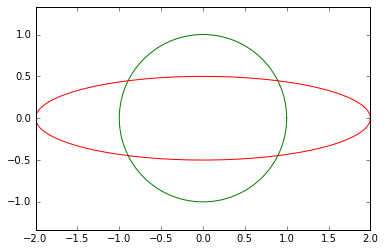

In [2]:
# parametric definition of unit circle
theta = linspace(0, 2*pi, 300)
Xc, Yc = cos(theta), sin(theta)
plot(Xc, Yc, 'g')

# Apply deformation gradient and plot ellipse
F = array([[2,0],[0,0.5]])
xe, ye = dot(F, [Xc, Yc])
plot(xe, ye, 'r')
axis('equal')

To visualize deformation gradient $\mathbf{F}$ we have to calculate displacement for points on regular grid and plot it using command `quiver`.

(-3.0, 3.0, -2.0, 2.0)

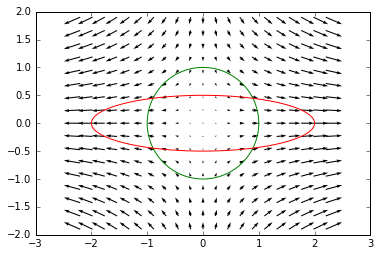

In [3]:
# create rectangular grid
Xg, Yg = meshgrid(linspace(-2.2, 2.2, 21), linspace(-1.9, 1.9, 17))
X, Y = Xg.flatten(), Yg.flatten()

# Apply deformation gradient
x, y = dot(F, [X, Y])

# plot
quiver(X, Y, x-X, y-Y, angles='xy')
plot(Xc, Yc, 'g', xe, ye, 'r')
axis('equal')

We can also calculate displacements directly using displacement gradient $\mathbf{\nabla u}$:

(-3.0, 3.0, -2.0, 2.0)

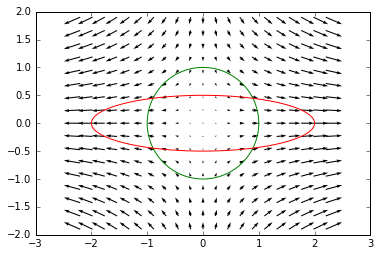

In [4]:
# calculate displacements
J = F - eye(F.ndim)
u, v = dot(J, [X, Y])

# plot
quiver(X, Y, u, v, angles='xy')
plot(Xc, Yc, 'g', xe, ye, 'r')
axis('equal')

In [5]:
from IPython.core.display import HTML
def css_styling():
    styles = open("./css/sg2.css", "r").read()
    return HTML(styles)
css_styling()